In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv("BankCustomers.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
X = df.iloc[:, 3:13]
y = df.iloc[:, 13]
# convert categorical feature into dummy variables

states=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

#concatenate the remaining dummies columns
X=pd.concat([X,states,gender],axis=1)

#drop the columns as it is no longer required

X=X.drop(['Geography','Gender'],axis=1)

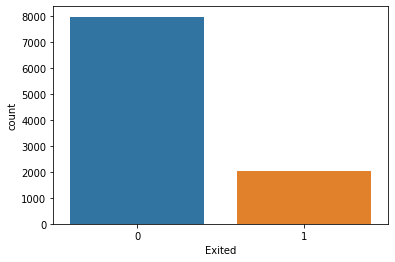

In [8]:
sns.countplot(x='Exited', data=df)

In [9]:
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
scaled_data=scaler.transform(X)
X=scaled_data

In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [11]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
predictions=logmodel.predict(X_test)

C:\Users\sabuh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,predictions)
#confusion matrix
conf_matrix = confusion_matrix(y_test,predictions)
print("\n Classification report : \n",classification_report(y_test,predictions))
print("Accuracy   Score : ",accuracy_score(y_test,predictions))
print("F1   Score : ",f1_score(y_test,predictions))
print(conf_matrix)


 Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      2379
           1       0.58      0.23      0.33       621

    accuracy                           0.81      3000
   macro avg       0.71      0.59      0.61      3000
weighted avg       0.78      0.81      0.77      3000

Accuracy   Score :  0.8066666666666666
F1   Score :  0.32870370370370366
[[2278  101]
 [ 479  142]]


In [14]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(logmodel,X,y,cv=5)
print("Corss_Vall result:",score.mean())

Corss_Vall result: 0.8097000620000155


C:\Users\sabuh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sabuh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sabuh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sabuh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sabuh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t